# Group 182


# Imported all the libraries


In [1]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
#import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [2]:
# Let us load the dataset and Print two rows of the dataset
df = pd.read_csv('insurance.csv')
print(df.head(2))


   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523


In [3]:
# Print the more information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.
#Our objective is to find a way to create a model for charges

In [5]:
# Let us see statistical information about the Numerical features
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
# Identify NULL or Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)
# Handle Missing Values
df = df.dropna()  # Drop rows with missing values
# or
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)  # Impute with mean value

# Handle Outliers (assuming 'column_name' contains numerical data)
z_scores = (df['charges'] - df['charges'].mean()) / df['charges'].std()
outliers = z_scores[abs(z_scores) > 3]
print("Outliers:")
print(outliers)

# Remove Outliers
df = df[abs(z_scores) <= 3]

# Address Skewed Data (assuming 'column_name' contains skewed data)
df['charges'] = np.log1p(df['charges'])  # Logarithmic transformation
# Split the data into features and target
X = df.drop('charges', axis=1)
y = df['charges']

df.info()

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Outliers:
34      3.131635
543     4.170104
577     3.740761
819     3.457055
1146    3.246934
1230    3.860523
1300    4.072866
Name: charges, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.2+ KB


#Data Visualization

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['red'],
                    title='Distribustion of BMI (Body Mass Index)')

fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(df,
                    x='charges',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green', 'orange'],
                    title="Annual Medical Charges")

fig.update_layout(bargap=0.1)
fig.show()   


In [11]:
fig = px.histogram(df,
                    x="charges",
                    marginal="box",
                    color="sex",
                    color_discrete_sequence=["blue", "purple"],
                    title="Annual Medical Charges by Sex")

fig.update_layout(bargap=0.1)
fig.show()  

In [12]:
fig = px.histogram(df,
                    x="charges",
                    marginal="box",
                    color="region",
                    color_discrete_sequence=["grey", "orange", "green","violet"],
                    title="Annual Medical Charges by Region")

fig.update_layout(bargap=0.1)
fig.show()      

In [13]:
px.histogram(df, x="smoker", color="sex", title="Smoker")

In [14]:
px.histogram(df, x="region", color="smoker", title="Region")

In [15]:
px.histogram(df, x="smoker", color="children", title="Smoker Vs Children")

In [16]:
fig = px.scatter(df,
                x="age",
                y="charges",
                color="smoker",
                opacity=0.8,
                hover_data=["sex"],
                width=800,
                height=500,
                title="Age vs Charges")

fig.update_traces(marker_size=5)
fig.show()        

#This graph clearly shows that smoker has higher medical expense compared to non-smokers

In [17]:
fig = px.scatter(df,
                x="bmi",
                y="charges",
                color="smoker",
                hover_data=['sex'],
                opacity=0.8,
                width=800,
                height=500,
                title="BMI Vs Charges")

fig.update_traces(marker_size=5)
fig.show()   

In [18]:
#We dont see any evidence of any direct relationship between BMI and charges , however again we can see smokers have 
#higher medical charges

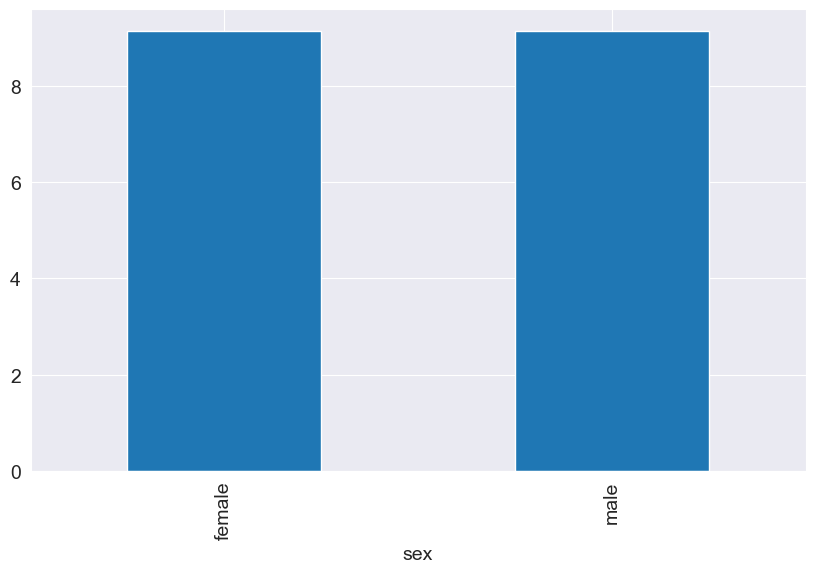

In [19]:
df.groupby("sex")['charges'].median().plot.bar()
plt.show()

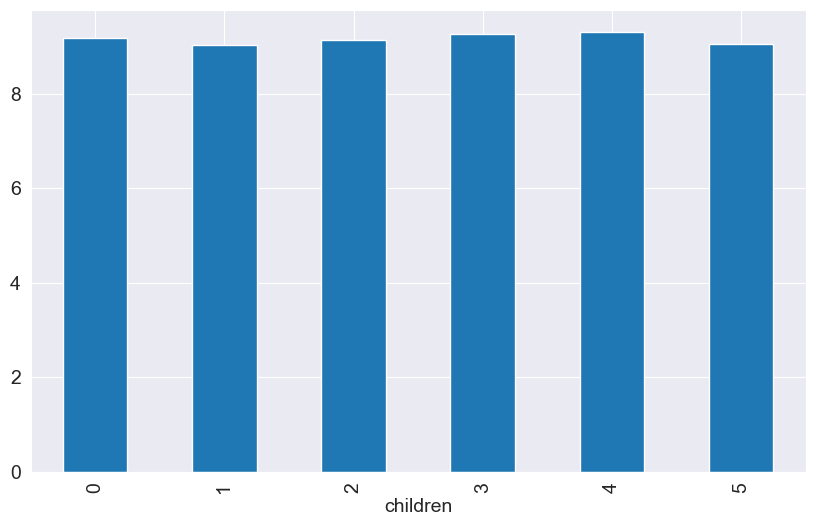

In [20]:
df.groupby("children")['charges'].median().plot.bar()
plt.show()

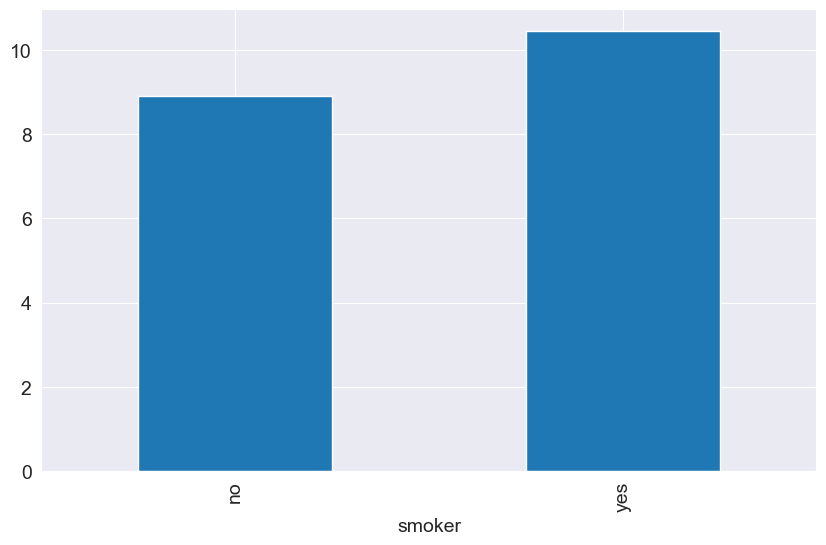

In [21]:
df.groupby("smoker")['charges'].median().plot.bar()
plt.show()

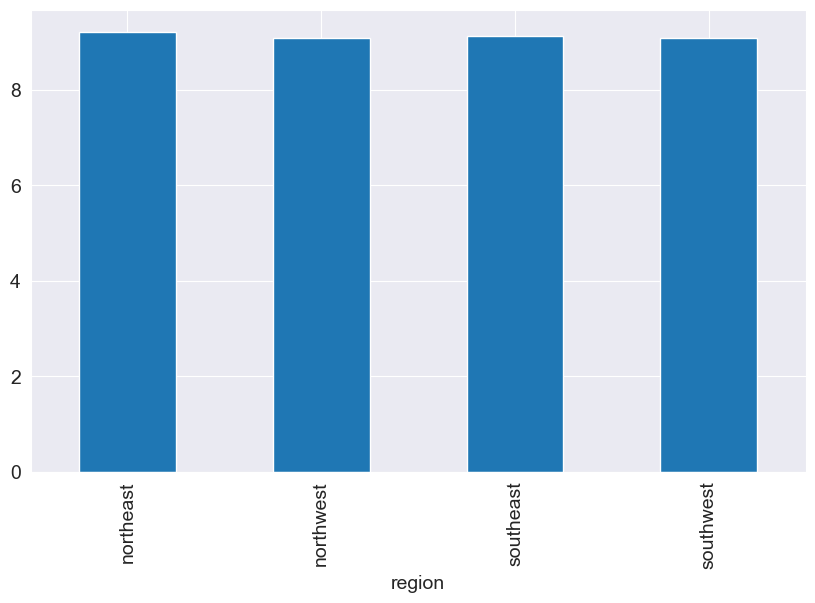

In [22]:
df.groupby("region")['charges'].median().plot.bar()
plt.show()

In [23]:
df['charges'].hist(bins=25)
plt.show()

In [24]:
fig = px.histogram(data_frame=df, x='bmi', y='charges', width=800, height=500, title='Charges by BMI')
fig.show()

In [25]:
fig = px.histogram(df, x="bmi", y="charges", color="sex", marginal="rug", hover_data=df.columns)
fig.show()

In [26]:
fig = px.scatter(df, x="bmi", y="charges", color='sex', facet_col="children")
fig.update_xaxes(matches=None)
fig.show()

Text(0.5, 1.0, 'Correlation Matrix')

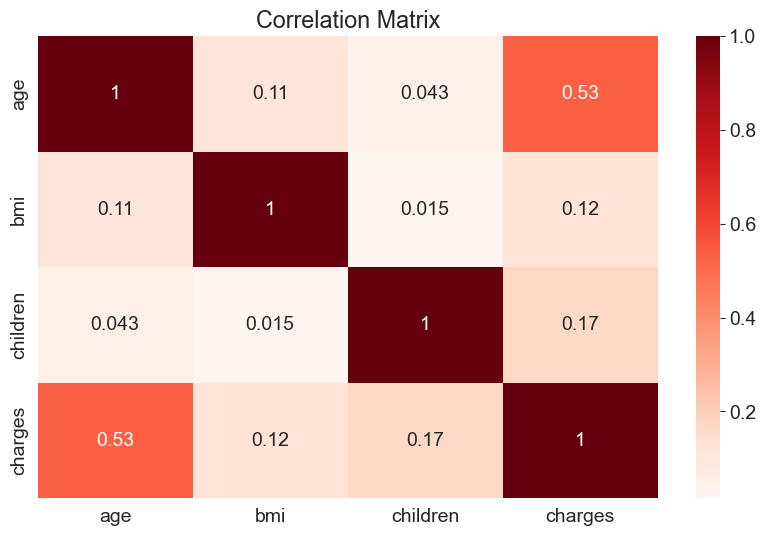

In [27]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')
#a high correlation cannot be used to interpret a cause-effect relationship between features. Two features and can be correlated if 
#causes or if causes , or if both are caused independently by some other factor , and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that 
#are simply appear to be correlated because the sample is too small.
#As  from the analysis, the values in some columns are more closely related to the values in "expenses" compared to 
#other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

In [28]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.6583878634762383

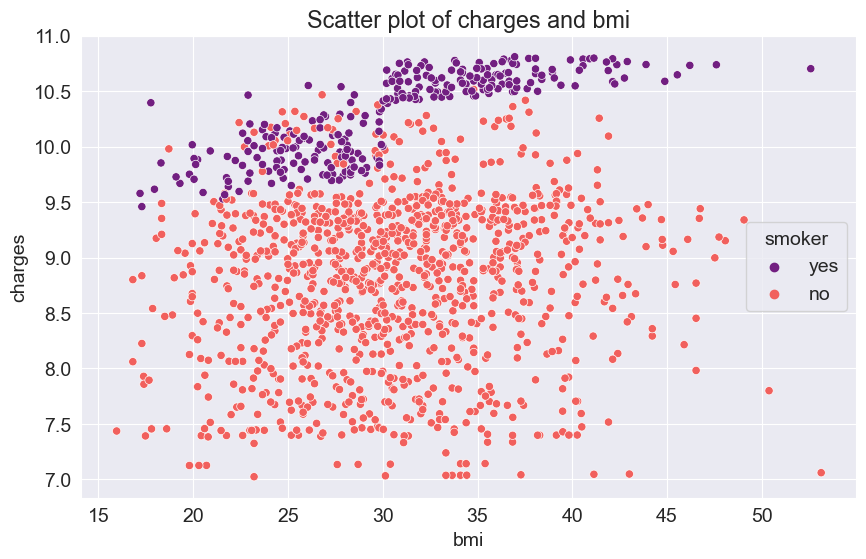

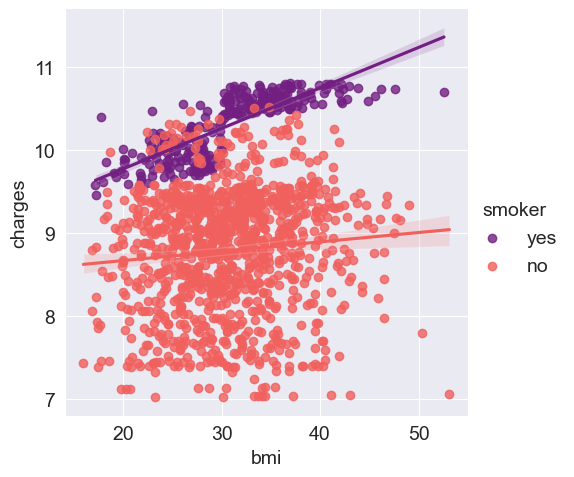

In [29]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma')
##This clearly shows that charges for smoker is generally higher.  But dont see any correlation between bmi and charges as such

#Feature Transformation techniques

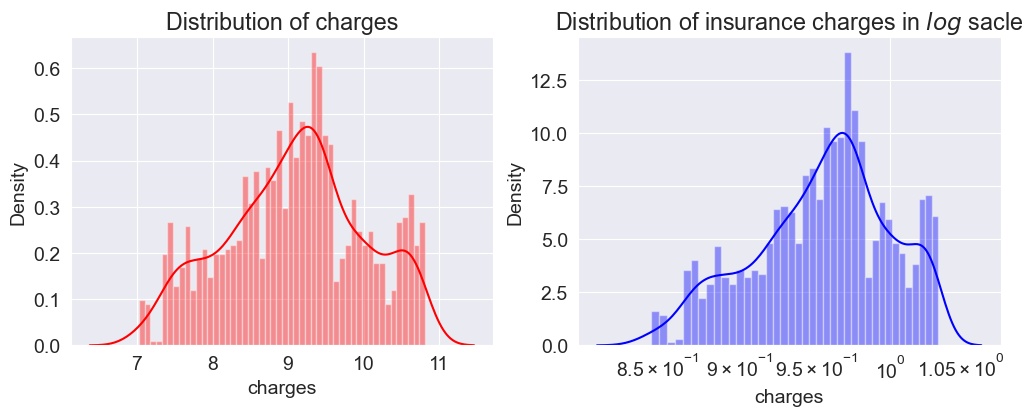

In [30]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

In [31]:
#If we look at the left plot the expenses varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.
X = df.drop(['charges'], axis=1)
y = df['charges']

In [32]:
# Saving the cleaned data
X.to_csv('clean_data.csv')

# Model Building

In [33]:
#Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; 
#they might behave badly if the individual features do not more or less look like standard normally distributed data: 
#Gaussian with zero mean and unit variance.
#Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution 
#of the data into the below format:
#mean – 0 (zero)
#standard deviation – 1
#One-hot Encoding
#The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.
# Creating new variables for numerical attributes/columns

numeric_features = ['age', 'bmi', 'children']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['sex', 'smoker','region']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [34]:
# Splitting the dataset for training and testing the model
#Case 1 : Train = 80 % Test = 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Splitting the dataset for training and testing the model
#Case 2 : Train = 10 % Test = 90% 
A_train, A_test, b_train, b_test = train_test_split(X, y, test_size=0.9, random_state=42)


In [37]:
# Let us check shape of the training & test set
print(X_train.shape, y_test.shape)

(1064, 6) (267,)


In [40]:
# Let us check shape of the training & test set
print(A_train.shape, b_test.shape)

(133, 6) (1198,)


Linear Regression

In [41]:
#Linear Regression for 80% train data
linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :0.2009759596744855
The Root Mean Squared Error using Linear Regression :0.4483034236702699
The r2_score using Linear Regression :0.7616333864136097


 Explore the Kfold cross validation 

In [42]:

from sklearn.model_selection import cross_val_score, KFold

k_folds=KFold(n_splits=5, shuffle=True, random_state=42)  # 80% train data, 20% test data
#cross_val_score take parameters - model, training data, target variable, no. of folds
scores_k_fold=cross_val_score(linear_reg, X, y, cv=k_folds)  #Performing k-fold cross-validation without train test splitting

print ("Cross Validation Scores : ", scores_k_fold)
print("Avg cross validation score : ", scores_k_fold.mean())


Cross Validation Scores :  [0.76163339 0.73733056 0.77287943 0.77993261 0.75739732]
Avg cross validation score :  0.7618346614142346


In [43]:
#Linear Regression for 10% train data
linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(A_train, b_train)

b_pred = linear_reg.predict(A_test)

linear_reg_mse1 = mean_squared_error(b_test, b_pred)
linear_reg_rmse1 = mean_squared_error(b_test, b_pred, squared=False)
linear_reg_r2_score1 = r2_score(b_test, b_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse1))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse1)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score1)))

The Mean Squared Error using Linear Regression :0.20578791659886855
The Root Mean Squared Error using Linear Regression :0.4536385307696741
The r2_score using Linear Regression :0.7547364325239707


In [44]:
score = []
for i in range(1000):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=i)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(r2_score(y_test, y_pred))

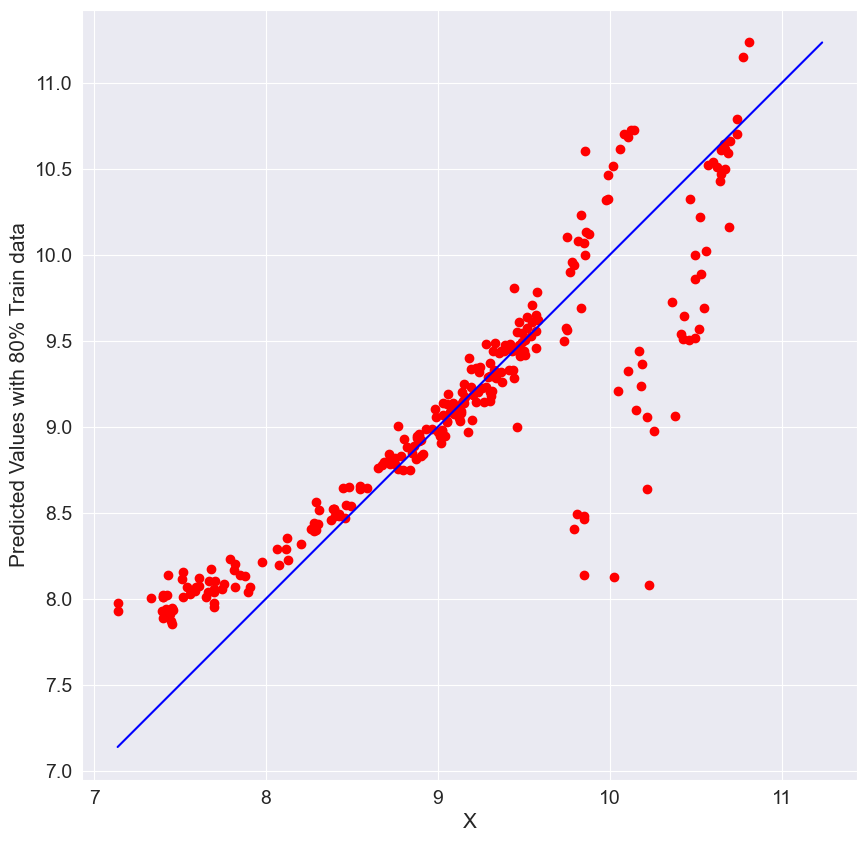

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='red')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('X', fontsize=15)
plt.ylabel('Predicted Values with 80% Train data', fontsize=15)
plt.axis('equal')
plt.show()

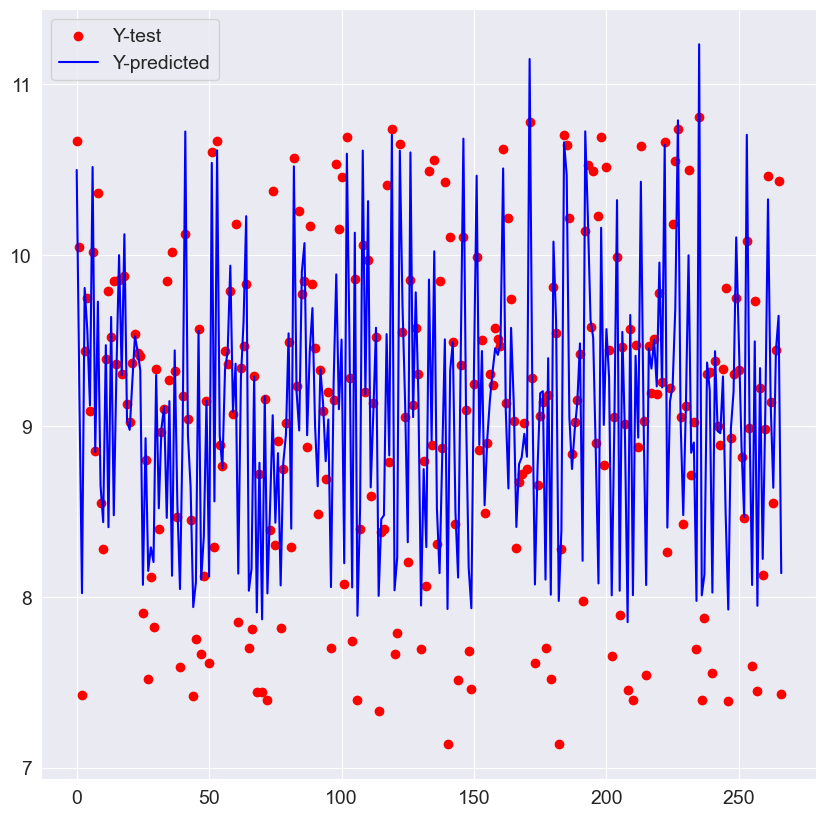

In [46]:
plt.figure(figsize=(10,10))

plt.scatter(np.arange(y_test.shape[0]),y_test,label="Y-test",color='r')
plt.plot(np.arange(y_pred.shape[0]),y_pred,label="Y-predicted",color='b')

plt.legend()
plt.show()


In [47]:
score1 = []
for i in range(1000):
    A_train, A_test, b_train, b_test  = train_test_split(X, y, test_size=0.9, random_state=i)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
    clf.fit(A_train, b_train)
    b_pred = clf.predict(A_test)
    score.append(r2_score(b_test, b_pred))

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(b_test, b_pred, c='blue')

p1 = max(max(b_pred), max(b_test))
p2 = min(min(b_pred), min(b_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('X', fontsize=15)
plt.ylabel('Predicted Values with 10% Train data', fontsize=15)
plt.axis('equal')
plt.show()

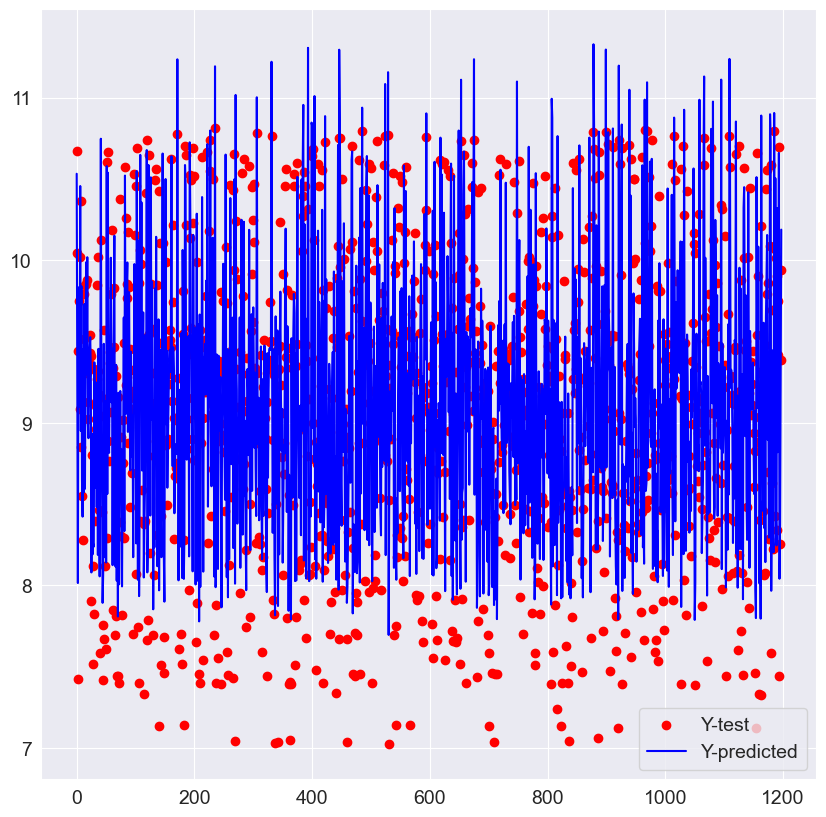

In [49]:
plt.figure(figsize=(10,10))

plt.scatter(np.arange(b_test.shape[0]),b_test,label="Y-test",color='r')
plt.plot(np.arange(b_pred.shape[0]),b_pred,label="Y-predicted",color='b')

plt.legend()
plt.show()


In [50]:
np.argmax(score)

207

In [51]:
score[np.argmax(score)]

0.8552713897244345

In [52]:
#after discussing with Sir in class added decision tree too
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 0.2040496882891018
The Root Mean Squared Error using Decision Tree Regressor : 0.3846169566458008
The r2_score using Decision Tree Regressor : 0.8276032445365687


#Performance Measure

In [53]:

models = pd.DataFrame({
    'Model' : ['Linear Regression for 80% train data','Linear Regression for 10% train data','Decision Tree' ],
    'RMSE' : [linear_reg_rmse,linear_reg_rmse1,decision_tree_rmse],
    'r2_score' : [linear_reg_r2_score,linear_reg_r2_score1,decision_tree_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

Model      RMSE  r2_score
2                         Decision Tree  0.384617  0.827603
0  Linear Regression for 80% train data  0.448303  0.761633
1  Linear Regression for 10% train data  0.453639  0.754736

#From the above graphs and table we can clearly see that with 80% train data , our linear regression works well. 
#However if we compare this with Decision tree , then Decision tree provides a better result/